# **Regresi Dataset Energy Consumption**

## **PENJELASAN DATASET [ Energy Consumption Dataset ]**

> Dataset ini dirancang untuk memprediksi konsumsi energi berdasarkan berbagai fitur bangunan dan faktor lingkungan. Dataset ini berisi data untuk berbagai jenis bangunan, luas bangunan, jumlah penghuni, peralatan yang digunakan, suhu rata-rata, dan hari dalam seminggu. Tujuannya adalah untuk membangun model prediktif untuk memperkirakan konsumsi energi dengan menggunakan atribut-atribut ini.

> Dataset ini dapat digunakan untuk melatih model pembelajaran mesin seperti regresi linier untuk memperkirakan kebutuhan energi berdasarkan karakteristik bangunan. Hal ini berguna untuk memahami pola permintaan energi dan mengoptimalkan konsumsi energi di berbagai jenis bangunan dan kondisi lingkungan.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
!kaggle datasets download -d govindaramsriram/energy-consumption-dataset-linear-regression

Dataset URL: https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 21.3MB/s]


In [ ]:
!unzip energy-consumption-dataset-linear-regression.zip

Archive:  energy-consumption-dataset-linear-regression.zip
  inflating: test_energy_data.csv    
  inflating: train_energy_data.csv   


In [ ]:
data = "test_energy_data.csv"
df = pd.read_csv(data, sep=',', encoding='latin-1', low_memory=False)
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [ ]:
# Definisikan X dan Y
Y = df[['Square Footage']]  # Harus berbentuk array 2D
X = df.drop(['Square Footage','Appliances Used'], axis=1)

In [ ]:
print(X)

   Building Type  Number of Occupants  Average Temperature Day of Week  \
0    Residential                   15                28.52     Weekday   
1     Commercial                   56                23.07     Weekend   
2     Commercial                    4                33.56     Weekday   
3    Residential                   84                27.39     Weekend   
4    Residential                   58                17.08     Weekday   
..           ...                  ...                  ...         ...   
95    Commercial                   81                15.45     Weekend   
96   Residential                   50                21.73     Weekend   
97    Commercial                   27                16.86     Weekend   
98    Industrial                   56                11.77     Weekend   
99   Residential                   72                29.62     Weekday   

    Energy Consumption  
0              2865.57  
1              4283.80  
2              5067.83  
3          

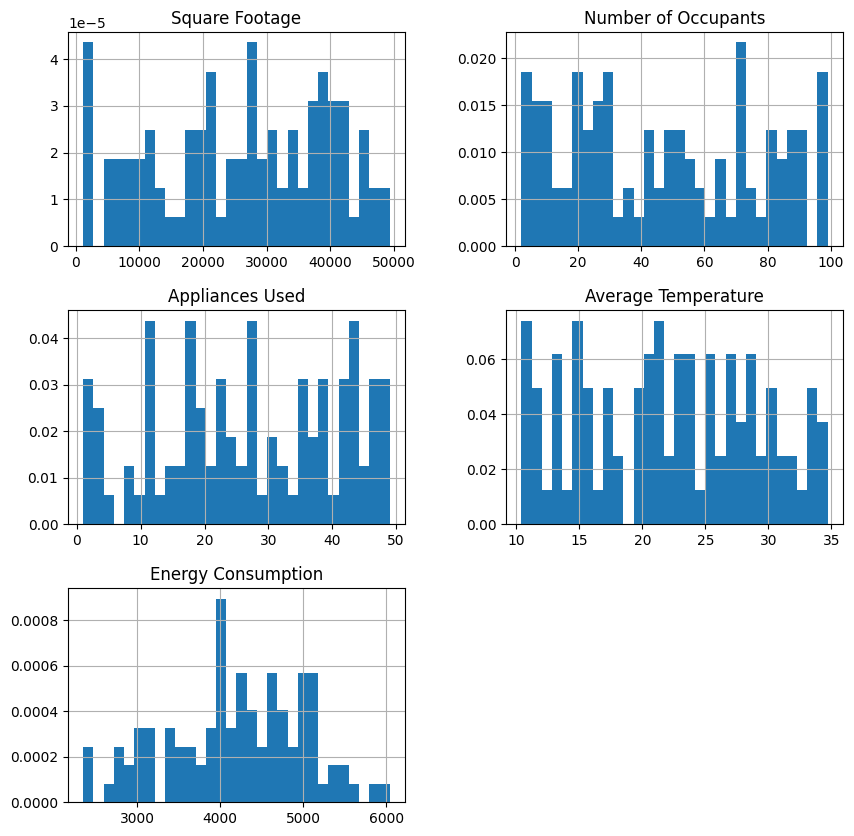

In [ ]:
df.hist(bins=30, figsize=(10,10), density=True)
plt.show()

### **Membaca Histogram (Density Normalization)**
> Sumbu Y menunjukkan kepadatan probabilitas, bukan jumlah absolut.

> Nilai pada sumbu Y lebih kecil karena menunjukkan proporsi relatif dari total data dalam setiap bin.

> Puncak histogram berarti rentang luas bangunan tersebut lebih umum dibandingkan rentang lainnya.


---
### **Interpretasi Histogram**
1). **Square Footage (Multimodal)**: Distribusi cukup tersebar dengan banyak variasi ukuran rumah.
Dengan puncak kecil di sekitar 0-5000 sqft dan distribusi yang relatif merata setelahnya.

2). **Number of Occupants (Multimodal)**: Jumlah penghuni bervariasi, tidak ada pola yang jelas. Ada beberapa titik di mana jumlah penghuni lebih sering muncul dibanding lainnya.

3). **Appliances Used (Bimodal)**: Distribusi tidak merata, ada banyak fluktuasi. Rumah dengan jumlah alat elektronik tertentu lebih umum daripada jumlah lainnya.

4). **Average Temperature (Uniform)**: Cenderung terdistribusi merata antara 10°C hingga 35°C. Tidak ada puncak dominan, yang menunjukkan bahwa suhu rata-rata rumah dalam dataset cukup bervariasi.

5). **Energy Consumption (Skew Right)**: Sebagian besar rumah mengonsumsi energi di sekitar 3500 - 5000, tapi ada beberapa yang memiliki konsumsi energi lebih tinggi.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Menggunakan OneHotEncoder untuk mengubah data kategorikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['Building Type', 'Day of Week']])

# Mengubah hasil encoding menjadi DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Building Type', 'Day of Week']))

# Gabungkan dengan fitur numerik lainnya
X_numeric = X.drop(columns=['Building Type', 'Day of Week']).reset_index(drop=True)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

In [ ]:
print(X.dtypes)
print(X.head())

Building Type           object
Number of Occupants      int64
Average Temperature    float64
Day of Week             object
Energy Consumption     float64
dtype: object
  Building Type  Number of Occupants  Average Temperature Day of Week  \
0   Residential                   15                28.52     Weekday   
1    Commercial                   56                23.07     Weekend   
2    Commercial                    4                33.56     Weekday   
3   Residential                   84                27.39     Weekend   
4   Residential                   58                17.08     Weekday   

   Energy Consumption  
0             2865.57  
1             4283.80  
2             5067.83  
3             4624.30  
4             4820.59  


***Kode One-Hot Encoding masih perlu diubah, karena:***
>'Building Type' dan 'Day of Week' perlu diubah menjadi representasi numerik sebelum masuk ke model.

> drop='first' menghindari dummy variable trap.

> Data hasil encoding digabung dengan fitur numerik lainnya untuk membentuk X_final, yang sepenuhnya numerik.

In [ ]:
# Membuat model regresi
model = LinearRegression()
model.fit(X_final, Y)

# Prediksi nilai Y
Y_pred = model.predict(X_final)
print(Y_pred)

[[16577.40063527]
 [26193.1607714 ]
 [50942.95981048]
 [36272.0794851 ]
 [41438.35187262]
 [31653.65557667]
 [43941.60505535]
 [ 6714.72414645]
 [18206.62821112]
 [23604.22753101]
 [34695.70676381]
 [13117.96307272]
 [30221.71924764]
 [32912.58944294]
 [14785.04557627]
 [13456.04012197]
 [27509.09163876]
 [14089.8643328 ]
 [12826.09332621]
 [25303.02976903]
 [20256.86454998]
 [30909.81666365]
 [37444.34552719]
 [19759.87081249]
 [41925.36337091]
 [24476.18292365]
 [38420.34957428]
 [35047.287921  ]
 [27226.14043257]
 [26337.41495291]
 [26149.76236176]
 [48827.61203105]
 [49784.99417669]
 [16970.2399868 ]
 [28878.18279993]
 [30010.99408991]
 [41823.06227865]
 [21836.44584227]
 [10165.2397431 ]
 [50476.82308852]
 [40303.64955006]
 [18865.0011994 ]
 [44604.92427368]
 [30093.35786541]
 [35837.43736148]
 [11272.18804929]
 [41512.68943752]
 [10254.34882203]
 [16351.52023364]
 [25767.9106828 ]
 [19390.19042745]
 [39713.01513239]
 [36510.75469034]
 [13722.07480462]
 [ 5477.55765071]
 [40814.06

**Penjelasan Y_Pred**

> Y_pred merupakan nilai perkiraan Square Footage berdasarkan fitur-fitur yang diberikan (jumlah penghuni, suhu rata-rata, tipe bangunan, dan hari dalam seminggu).

> => Setiap angka dalam output merepresentasikan prediksi konsumsi energi untuk masing-masing data dalam dataset. Sebagian besar nilai berada di rentang ribuan hingga puluhan ribu. Namun, ada beberapa nilai (negatif), yang mungkin menunjukkan adanya masalah dalam model atau data.

In [ ]:
# Menampilkan hasil regresi
print(model.intercept_)
print(model.coef_)
print(r2_score(Y,Y_pred))

[-46202.07957389]
[[ -188.21835914   197.31436498    18.01087304 -8327.50619208
   8363.93244197  1228.44811681]]
0.8444989750855838


> **Output 01** = Jika semua fitur bernilai 0, maka konsumsi energi diprediksi sekitar -46.202. Nilai negatif bisa dikarenakan skala fitur (jika X memiliki nilai yang besar, sementara Y lebih kecil atau berbeda skala).

> **Output 02** = Koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi konsumsi energi.

* -188.22: Jika Number of Occupants naik 1 orang, konsumsi energi berkurang 188.22 unit.

* 197.31: Jika Average Temperature naik 1°C, konsumsi energi bertambah 197.31 unit.

* -8327.51 dan 8363.93: Efek dari One-Hot Encoding pada kategori seperti Building Type (Residensial dan Komersial).

* 18.01: Setiap tambahan 1 unit Energy Consumption meningkatkan Square Footage 18.01 satuan.

* 1228.45: Jika Day of Week adalah Weekend, maka Energy Consumption naik sekitar 1228.45 unit dibanding Weekday.

> **Output 03:** r2_score digunakan untuk mengevaluasi seberapa baik model memprediksi Y berdasarkan X. Model memiliki **akurasi 84.4%** dalam menjelaskan variasi konsumsi energi berdasarkan fitur yang diberikan.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit dan transform kolom kategorikal
X_for_encoding = df[['Building Type', 'Day of Week']]
X_encoded = encoder.fit_transform(X[['Building Type', 'Day of Week']])

# Mengubah hasil encoding menjadi DataFrame
encoded_cols = encoder.get_feature_names_out(['Building Type', 'Day of Week'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Gabungkan kembali dengan dataset asli (hapus kolom lama)
X = X.drop(['Building Type', 'Day of Week'], axis=1)
X = pd.concat([X, X_encoded_df], axis=1)

print(X.head())  # Cek hasilnya
print(X.dtypes)  # Pastikan semua numerik

   Number of Occupants  Average Temperature  Energy Consumption  \
0                   15                28.52             2865.57   
1                   56                23.07             4283.80   
2                    4                33.56             5067.83   
3                   84                27.39             4624.30   
4                   58                17.08             4820.59   

   Building Type_Industrial  Building Type_Residential  Day of Week_Weekend  
0                       0.0                        1.0                  0.0  
1                       0.0                        0.0                  1.0  
2                       0.0                        0.0                  0.0  
3                       0.0                        1.0                  1.0  
4                       0.0                        1.0                  0.0  
Number of Occupants            int64
Average Temperature          float64
Energy Consumption           float64
Building Type_Indu

### **Cara Kerja One-Hot Encoding:**
> **"Building Type" (Tipe Bangunan)** diubah menjadi 2 kolom:
* Building Type_Industrial → 1 jika bangunan Industrial, 0 jika tidak.
* Building Type_Residential → 1 jika bangunan Residential, 0 jika tidak.

> **"Day of Week" (Hari dalam Seminggu)** diubah jadi:
* Day of Week_Weekend → 1 jika Weekend, 0 jika Weekday.


In [ ]:
import statsmodels.api as sm

# Menambahkan konstanta untuk estimasi intersep
X = sm.add_constant(X)

# Model regresi dengan OLS
model_ols = sm.OLS(Y, X).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         Square Footage   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     84.18
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.16e-35
Time:                        01:17:53   Log-Likelihood:                -1000.9
No. Observations:                 100   AIC:                             2016.
Df Residuals:                      93   BIC:                             2034.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## **Evaluasi Model**

* R-squared: 0.844 (84.4%) → Model menjelaskan 84.4% variasi Square Footage
* F-statistic: 84.18, p < 0.001 → Model signifikan
* Durbin-Watson: 2.295 → Tidak ada autokorelasi

> Koefisien & Interpretasi

> Intercept (-46,202.08) → Square Footage saat semua variabel nol;

* Number of Occupants (-188.22) → Tambah 1 orang → Square Footage menurun 188.22
* Average Temperature (+197.31) → Naik 1°C → Square Footage meningkat 197.31
* Energy Consumption (+18.01) → Naik 1 unit → Square Footage meningkat 18.01
* Building Type (Industrial: -8327.51, Residential: +8363.93)
* Day of Week (Weekend: +1228.45, p = 0.300)

> Variabel signifikan (p-value < 0.05):

[Benar]: Number of Occupants, Average Temperature, Energy Consumption, Building
Type_Industrial, Building Type_Residential

[Salah]: Variabel tidak signifikan (p-value > 0.05): Day of Week_Weekend (p = 0.300, tidak berpengaruh secara statistik).

In [ ]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 28940863.1784
R-squared: 0.8445


### **Interpretasi Model Lengkap (Dengan Variabel Tambahan)**
> MSE: 28,940,863.18 → Kesalahan prediksi jauh lebih kecil, menunjukkan model lebih akurat.

> R-squared: 0.844 → Model menjelaskan 84.45% variasi Square Footage.

> Dengan tambahan variabel, model bisa memprediksi lebih baik dibandingkan hanya menggunakan Energy Consumption.

# **Percobaan Dengan X Baru**

In [ ]:
X = df[['Energy Consumption']]

In [ ]:
print(X)

    Energy Consumption
0              2865.57
1              4283.80
2              5067.83
3              4624.30
4              4820.59
..                 ...
95             3010.81
96             4248.49
97             2843.60
98             3348.39
99             4722.59

[100 rows x 1 columns]


In [ ]:
# Membuat model regresi
model = LinearRegression()
model.fit(X, Y)

# Prediksi nilai Y
Y_pred = model.predict(X)
print(Y_pred)

[[10118.43275742]
 [27029.25738087]
 [36377.94823462]
 [31089.34339251]
 [33429.88460609]
 [35881.91423144]
 [28469.18685742]
 [ 4499.89375982]
 [23276.68860342]
 [37199.02759662]
 [37504.75624666]
 [21380.78940856]
 [28420.53736864]
 [35469.46672735]
 [29308.86749454]
 [ 7763.34439279]
 [35420.3402828 ]
 [24121.97347086]
 [16351.29078974]
 [24467.28945   ]
 [28174.78590697]
 [34635.86727633]
 [36963.05372828]
 [31470.7887714 ]
 [41634.12008422]
 [26093.82787246]
 [26932.07764226]
 [29511.45445882]
 [23635.00162735]
 [20771.00145368]
 [32934.92375339]
 [30845.26127603]
 [48000.52573278]
 [17798.25536393]
 [18862.22445297]
 [23687.4667623 ]
 [25950.86037972]
 [22548.25790018]
 [ 4630.69888037]
 [42856.7962065 ]
 [33057.62062581]
 [21739.81786615]
 [34348.85914035]
 [28758.81825014]
 [26939.23197885]
 [17762.48368101]
 [37629.24170323]
 [ 8524.20808854]
 [13670.20315474]
 [25423.34729556]
 [13632.40440979]
 [27157.91620044]
 [38859.19140103]
 [12587.39431269]
 [19228.76496398]
 [35745.50

**Penjelasan Output:** Setiap angka dalam array 2D adalah nilai prediksi dari Square Footage berdasarkan jumlah energi yang digunakan (Energy Consumption).
> Contoh:
Bangunan dengan konsumsi energi tertentu diprediksi memiliki luas 10,118.43 square feet.
Bangunan lain dengan konsumsi energi lebih tinggi diprediksi memiliki luas 36,377.95 square feet. **(Square Footage berarti mempengaruhi Energy Consumption)**

In [ ]:
# Menampilkan hasil regresi
print(model.intercept_)
print(model.coef_)
print(r2_score(Y,Y_pred))

[-24050.32105275]
[[11.92389431]]
0.5242327298219547


> **Output 01** = Jika semua fitur bernilai 0, maka konsumsi energi diprediksi sekitar -24050.32. Nilai negatif bisa dikarenakan skala fitur (jika X memiliki nilai yang besar, sementara Y lebih kecil atau berbeda skala).

> **Output 2** = Setiap kenaikan 1 unit dalam Energy Consumption, maka Square Footage meningkat sekitar 11.92. (Semakin besar koefisien, semakin besar pengaruh variabel terhadap prediksi).

> **Output 03** = R² = 0.524 berarti 52.4% variasi dalam Square Footage bisa dijelaskan oleh Energy Consumption. Nilai ini menunjukkan bahwa model cukup baik, tapi masih ada variabel lain yang berpengaruh.

In [ ]:
import statsmodels.api as sm

# Menambahkan konstanta untuk estimasi intersep
X = sm.add_constant(X)

# Model regresi dengan OLS
model_ols = sm.OLS(Y, X).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         Square Footage   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.71e-17
Time:                        01:17:53   Log-Likelihood:                -1056.8
No. Observations:                 100   AIC:                             2118.
Df Residuals:                      98   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.405e+04   4898

## **Interpretasi Regresi OLS:**
> Kualitas Model:
* R-squared = 0.524 → Model menjelaskan 52.4% variasi dalam Square Footage berdasarkan Energy Consumption.
* Adj. R-squared = 0.519 → Koreksi terhadap jumlah variabel independen (karena hanya ada satu fitur, nilainya hampir sama dengan R²).
* Kesimpulan: Model cukup baik, tetapi masih ada 47.6% variabilitas yang tidak dijelaskan oleh Energy Consumption.

> Signifikansi Model
* F-statistic = 108.0, dengan p-value = 1.71e-17 (≈ 0.000) → Model sangat signifikan secara statistik.
* Kesimpulan: Ada hubungan yang kuat antara Energy Consumption dan Square Footage.

> Interpretasi Koefisien
* P>|t| (p-value) = 0.000 untuk kedua variabel → Sangat signifikan secara statistik.
* 95% Confidence Interval untuk Energy Consumption: [9.65, 14.20] → Koefisien berkisar antara nilai ini.

> Diagnostik Model
* Normalitas Error (Omnibus & Jarque-Bera Test): Omnibus = 4.832, Prob = 0.089 (p > 0.05) → Tidak ada bukti kuat bahwa error tidak normal.
* Skew = -0.313 → Error agak condong ke kiri, tetapi tidak signifikan. Kesimpulan: Error cukup mendekati normal.
* Independensi Residual (Durbin-Watson Test): Durbin-Watson = 1.839 → Nilai mendekati 2, yang berarti tidak ada autokorelasi yang mencolok.
Kesimpulan: Model cukup baik dalam hal independensi residual.
* Multikolinearitas (Condition Number): Cond. No. = 2.2e+04 (22,000) → Sangat tinggi.

In [ ]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 88546782.7531
R-squared: 0.5242


**Interpretasi MSE dan R-Squared:**
* Model regresi cukup baik, tetapi masih bisa ditingkatkan.
* R-squared (0.524) menunjukkan bahwa model hanya menjelaskan 52.42% variabilitas dalam Square Footage, sisanya dipengaruhi oleh faktor lain yang belum dimasukkan ke dalam model.
* MSE (88,546,782.75) cukup besar, menunjukkan bahwa prediksi model masih memiliki kesalahan yang signifikan.
* Perlu penambahan variabel lain atau metode yang lebih kompleks untuk meningkatkan akurasi model.


# **Model 2**

In [ ]:
# Definisikan X dan Y
Z = df[['Energy Consumption']]  # Harus berbentuk array 2D
A = df.drop(['Energy Consumption','Day of Week'], axis=1)

In [ ]:
print(A)

   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0    Residential           24563                   15                4   
1     Commercial           27583                   56               23   
2     Commercial           45313                    4               44   
3    Residential           41625                   84               17   
4    Residential           36720                   58               47   
..           ...             ...                  ...              ...   
95    Commercial            1161                   81               11   
96   Residential           37943                   50               23   
97    Commercial            1558                   27               29   
98    Industrial            2145                   56               12   
99   Residential           42414                   72               24   

    Average Temperature  
0                 28.52  
1                 23.07  
2                 33.56  
3      

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Menggunakan OneHotEncoder untuk mengubah data kategorikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
A_encoded = encoder.fit_transform(A[['Building Type']])

# Mengubah hasil encoding menjadi DataFrame
A_encoded_df = pd.DataFrame(A_encoded, columns=encoder.get_feature_names_out(['Building Type']))

# Gabungkan dengan fitur numerik lainnya
A_numeric = A.drop(columns=['Building Type']).reset_index(drop=True)
A_final = pd.concat([A_numeric, A_encoded_df], axis=1)

### **Penjelasan Input:**

> OneHotEncoder dari sklearn.preprocessing digunakan untuk mengonversi kolom kategorikal 'Building Type' dan 'Day of Week' menjadi representasi numerik.

* drop='first' menghapus satu kategori untuk menghindari dummy variable trap (redundansi).
* sparse_output=False memastikan hasilnya berbentuk array biasa, bukan sparse matrix.
* Transformasi dilakukan menggunakan fit_transform(), menghasilkan array dengan nilai biner.

> DataFrame Baru dibuat dengan kolom yang diberi nama sesuai dengan fitur yang dienkode menggunakan get_feature_names_out().

> Menggabungkan Data:

* Fitur numerik lainnya dalam X disimpan di X_numeric dengan menghapus 'Building Type' dan 'Day of Week'.
* Data hasil encoding (X_encoded_df) dikombinasikan dengan X_numeric menggunakan pd.concat().

In [ ]:
# Model Regresi 2
model = LinearRegression()
model.fit(A_final, Z) # Use A_final instead of A

# Prediksi Nilai Y
Z_pred = model.predict(A_final) # Use A_final instead of A
print(Z_pred)

[[2837.14203033]
 [4306.04141928]
 [5056.72576861]
 [4655.04467301]
 [4799.80888625]
 [4999.34123991]
 [4437.29159941]
 [2361.89226096]
 [3985.49174408]
 [5102.16228785]
 [5184.37859765]
 [3819.42527252]
 [4422.32070733]
 [4968.25246756]
 [4485.97549316]
 [2638.65324084]
 [4962.59756833]
 [4057.82873021]
 [3357.58627782]
 [4093.50448299]
 [4396.51644925]
 [4949.22971046]
 [5136.02491213]
 [4677.14887171]
 [5533.50554004]
 [4179.48561853]
 [4301.44681353]
 [4517.35823343]
 [3975.18151509]
 [3783.8964806 ]
 [4793.66220583]
 [4590.37654546]
 [6022.1204315 ]
 [3525.43213546]
 [3619.20883046]
 [4027.15939348]
 [4178.1326329 ]
 [3929.40078272]
 [2421.76448493]
 [5596.33374893]
 [4818.65105908]
 [3860.04020864]
 [4879.86772818]
 [4452.7889312 ]
 [4298.93854373]
 [3521.85975777]
 [5148.56287296]
 [2704.13986015]
 [3177.48023161]
 [4118.41950647]
 [3180.30797628]
 [4278.93755666]
 [5253.57691315]
 [3098.11145824]
 [3586.81967766]
 [5042.37896783]
 [3013.48762567]
 [5012.11239275]
 [4677.2608362

**Penjelasan Z_Pred**

> Z_pred merupakan nilai perkiraan Energy Consumption berdasarkan fitur-fitur yang diberikan (jumlah penghuni, suhu rata-rata, tipe bangunan, dan hari dalam seminggu).

> => Semakin besar Square Footage → Bisa jadi konsumsi energi naik karena bangunan lebih besar butuh lebih banyak listrik.
Semakin banyak penghuni → Bisa meningkatkan penggunaan energi.
Suhu rata-rata → Bisa mempengaruhi AC/heater, yang berdampak pada konsumsi energi.

In [ ]:
# Menampilkan hasil regresi
print(model.intercept_)
print(model.coef_)
print(r2_score(Z,Z_pred))

[1993.74343378]
[[ 5.03883178e-02  1.00066745e+01  2.02066709e+01 -4.45124339e+00
   4.98606461e+02 -4.98266992e+02]]
0.9991719772262697


> **Output 01:** Jika semua variabel independen bernilai nol, maka konsumsi energi diprediksi sekitar 1993.74 unit.

> **Output 02:**
* Square Footage (0.0504):	Setiap tambahan 1 unit luas bangunan, konsumsi energi naik 0.0504 unit.
* Number of Occupants	(10.0067):	Setiap tambahan 1 orang penghuni, konsumsi energi naik 10.0067 unit.
* Appliances Used	(20.2067):	Setiap tambahan 1 perangkat listrik, konsumsi energi naik 20.2067 unit.
* Building Type (Kategori):	-4.4512	Kalau ini numerik dari encoding, pengaruhnya kecil dan negatif.
* Average Temperature	(498.6064):	Setiap kenaikan 1 derajat suhu rata-rata, konsumsi energi naik 498.6 unit.
* Intercepted Feature	[-498.267]:	Efek dummy variabel atau kolinearitas.

> **Output 03:** Model dapat menjelaskan 99.92% variasi dalam konsumsi energi berdasarkan fitur yang diberikan.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit dan transform kolom kategorikal
A_encoded = encoder.fit_transform(A[['Building Type']])

# Mengubah hasil encoding menjadi DataFrame
encoded_cols = encoder.get_feature_names_out(['Building Type'])
A_encoded_df = pd.DataFrame(A_encoded, columns=encoded_cols, index=A.index)

# Gabungkan kembali dengan dataset asli (hapus kolom lama)
A = A.drop(['Building Type'], axis=1)
A = pd.concat([A, A_encoded_df], axis=1)

print(A.head())
print(A.dtypes)

   Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0           24563                   15                4                28.52   
1           27583                   56               23                23.07   
2           45313                    4               44                33.56   
3           41625                   84               17                27.39   
4           36720                   58               47                17.08   

   Building Type_Industrial  Building Type_Residential  
0                       0.0                        1.0  
1                       0.0                        0.0  
2                       0.0                        0.0  
3                       0.0                        1.0  
4                       0.0                        1.0  
Square Footage                 int64
Number of Occupants            int64
Appliances Used                int64
Average Temperature          float64
Building Type_Industrial     

In [ ]:
import statsmodels.api as sm

# Menambahkan konstanta untuk estimasi intersep
A = sm.add_constant(A)

# Model regresi dengan OLS
model_ols = sm.OLS(Z, A).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Energy Consumption   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.870e+04
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          5.62e-141
Time:                        01:17:53   Log-Likelihood:                -459.02
No. Observations:                 100   AIC:                             932.0
Df Residuals:                      93   BIC:                             950.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## **Interpretasi Regresi OLS**

> ***Statistik Model:***
* **R Score	(0.999):**	Model menjelaskan 99.9% variasi dalam konsumsi energi.
* **Adj. 𝑅 (0.999):**	Setelah penyesuaian jumlah variabel, akurasi tetap 99.9% (hampir tidak ada overfitting).
* **F-statistic	(1.870e+04):**	Model sangat signifikan secara keseluruhan.
* **Prob (5.62e-141):**	P-value sangat kecil → Model secara keseluruhan baik dalam menjelaskan data.

> ***Interpretasi Koefisien***
* **Intercept (const)**	-> 1993.74 -> 0.000	Saat semua variabel nol, konsumsi energi sekitar 1993.74 unit.
* **Square Footage** ->	0.0504 ->	0.000	Setiap tambahan 1 unit luas bangunan, konsumsi energi naik 0.0504 unit.
* **Number of Occupants**	-> 10.0067	-> 0.000	Setiap tambahan 1 orang penghuni, konsumsi energi naik 10.0067 unit.
* **Appliances Used**	-> 20.2067 ->	0.000	Setiap tambahan 1 perangkat listrik, konsumsi energi naik 20.2067 unit.
* **Average Temperature** -> -4.4512	-> 0.000	Setiap kenaikan 1 derajat suhu, konsumsi energi turun 4.4512 unit.
* **Building Type_Industrial**	-> 498.6065	-> 0.000	Jika Industrial, konsumsi energi naik 498.6 unit dibandingkan tipe referensi.
* **Building Type_Residential**	-> -498.2670	-> 0.000	Jika Residential, konsumsi energi turun 498.3 unit dibandingkan tipe referensi.

> ***Multikolinearitas & Masalah Statistik***
* **Durbin-Watson	(2.226):**	Tidak ada masalah autokorelasi residual.
* **Omnibus & Jarque-Bera Tests	(p < 0.05):**	Data tidak sepenuhnya normal (ada outlier).
* **Condition Number (1.64e+05):**	Tinggi → Ada kemungkinan multikolinearitas.

In [ ]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
mse = mean_squared_error(Z, Z_pred)
r2 = r2_score(Z, Z_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 568.2094
R-squared: 0.9992


### **Interpretasi MSE dan RScore:**
> Nilai MSE (568.2094): rata-rata kesalahan prediksi model adalah sekitar 568.2 unit dalam skala kuadrat.

> RScore (0.9992): sekitar 99.92% dari variasi konsumsi energi dapat dijelaskan oleh model regresi. Hanya sekitar 0.08% variasi yang tidak dapat dijelaskan oleh model.

In [ ]:
A1 = df[['Number of Occupants']]

In [ ]:
print(A1)

    Number of Occupants
0                    15
1                    56
2                     4
3                    84
4                    58
..                  ...
95                   81
96                   50
97                   27
98                   56
99                   72

[100 rows x 1 columns]


In [ ]:
# Membuat model regresi
model = LinearRegression()
model.fit(A1, Z)

# Prediksi nilai Y
Z1_pred = model.predict(A1)
print(Z1_pred)

[[3910.6857468 ]
 [4262.922628  ]
 [3816.18316892]
 [4503.47464444]
 [4280.10491489]
 [4185.60233701]
 [3936.45917713]
 [3962.23260746]
 [3988.0060378 ]
 [4555.0215051 ]
 [4529.24807477]
 [3979.41489435]
 [3799.00088203]
 [4486.29235755]
 [4469.11007066]
 [3867.73002958]
 [4408.97206655]
 [4262.922628  ]
 [4451.92778377]
 [4194.19348045]
 [4219.96691078]
 [4606.56836576]
 [3953.64146402]
 [4529.24807477]
 [4125.4643329 ]
 [4623.75065265]
 [4013.77946813]
 [4039.55289846]
 [3988.0060378 ]
 [3867.73002958]
 [4185.60233701]
 [3850.54774269]
 [4503.47464444]
 [4013.77946813]
 [3867.73002958]
 [3841.95659925]
 [3876.32117302]
 [3850.54774269]
 [3807.59202547]
 [4211.37576734]
 [4383.19863622]
 [4563.61264854]
 [4228.55805423]
 [4555.0215051 ]
 [4091.09975912]
 [4615.15950921]
 [3833.3654558 ]
 [4134.05547634]
 [4065.32632879]
 [4383.19863622]
 [4022.37061157]
 [4039.55289846]
 [4537.83921821]
 [4323.06063211]
 [4159.82890668]
 [3824.77431236]
 [4529.24807477]
 [4228.55805423]
 [4048.1440419

**Interpretasi Z1 Pred:**
> Prediksi konsumsi energi (Z1_pred) hanya berdasarkan jumlah penghuni menggunakan regresi linear sederhana.

> Semakin banyak penghuni, semakin tinggi konsumsi energi yang diprediksi.

> Model ini tidak mempertimbangkan faktor lain seperti luas bangunan, suhu, atau jenis bangunan, sehingga prediksinya bisa kurang akurat dibanding model yang lebih kompleks.

In [ ]:
# Menampilkan hasil regresi
print(model.intercept_)
print(model.coef_)
print(r2_score(Z,Z1_pred))

[3781.81859514]
[[8.59114344]]
0.09523002870910724


### **Penjelasan Output Hasil Regresi:**

(1) **Intercept (3781.82):** menunjukkan perkiraan konsumsi energi saat jumlah penghuni = 0.

(2) **Koefisien regresi (8.59):** menunjukkan bahwa setiap tambahan 1 penghuni meningkatkan konsumsi energi sebesar 8.59 satuan energi (dalam unit yang digunakan di dataset).

(3) **R-squared (R²) sebesar 0.095:** yang berarti hanya sekitar 9.5% variabilitas konsumsi energi yang dapat dijelaskan oleh jumlah penghuni.

In [ ]:
import statsmodels.api as sm

# Menambahkan konstanta untuk estimasi intersep
A_ = sm.add_constant(A1)

# Model regresi dengan OLS
model_ols = sm.OLS(Z, A1).fit()
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:     Energy Consumption   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              286.1
Date:                Mon, 10 Mar 2025   Prob (F-statistic):                    5.82e-31
Time:                        01:17:54   Log-Likelihood:                         -909.88
No. Observations:                 100   AIC:                                      1822.
Df Residuals:                      99   BIC:                                      1824.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### **Interpretasi Regresi OLS:**
> **Kualitas Model**
* R-squared (uncentered) = 0.743, menunjukkan bahwa 74.3% variasi konsumsi energi dapat dijelaskan oleh jumlah penghuni.
* Adjusted R-squared = 0.740, yang berarti model tetap cukup kuat meskipun hanya menggunakan satu variabel.

> **Pengaruh Variabel terhadap Konsumsi Energi**
* Koefisien Jumlah Penghuni = 65.9118
→ Setiap tambahan 1 penghuni meningkatkan konsumsi energi sebesar 65.91 satuan.
* P-value = 0.000 → Variabel ini sangat signifikan dalam mempengaruhi konsumsi energi.

> **Signifikansi Statistik**
* F-statistic tinggi (286.1, p < 0.0001) → Model ini secara keseluruhan sangat signifikan.
* Distribusi Residual:
Omnibus Test (p = 0.032) menunjukkan ada sedikit deviasi dari normalitas. Dan
Skewness dan kurtosis mendekati nilai normal, jadi distribusi error cukup baik.

In [ ]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
mse = mean_squared_error(Z, Z1_pred)
r2 = r2_score(Z, Z1_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 620875.1800
R-squared: 0.0952


> Mean Squared Error (MSE) = 620,875.18 menunjukkan bahwa rata-rata kesalahan prediksi cukup besar, sehingga model tidak mampu memperkirakan konsumsi energi dengan baik.

> R-squared = 0.0952 → Hanya 9.52% variasi dalam konsumsi energi yang dapat dijelaskan oleh jumlah penghuni.
→ Model ini sangat lemah dalam menjelaskan hubungan antara jumlah penghuni dan konsumsi energi.

# **KESIMPULAN**

## **Hasil Model (1)**
> Model (Regresi Berganda): Y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + ε

> Pengertian:
* Variabel Target (Y): "Square Footage"
* Variabel Independen (X): X1 = "Number of Occupants" -> X2 = "Average Temperature" -> X3 = "Day of Week" -> X4 = "Energy Consumption -> X5 = "Building Type"
* β0 = Intercept (nilai Y saat semua X = 0)
* β1 = Koefisien untuk variabel independen pertama X1 -> β2 = Koefisien untuk variabel independen pertama X2 -> β3 = Koefisien untuk variabel independen pertama X3 -> β4 = Koefisien untuk variabel independen pertama X4 -> β5 = Koefisien untuk variabel independen pertama X5
* ε = Galat/Error (Y Diketahui - Y Diprediksi)

> Menghasilkan RMSE dan RSquare:
* MSE: 28,940,863.18 → Kesalahan prediksi jauh lebih kecil, menunjukkan model lebih akurat.
* R-squared: 0.844 → Model menjelaskan 84.45% variasi Square Footage.

### **Hasil Model (1) dengan Variabel Khusus [Energy Consumption]**
> Model (Regresi): Y = β0 + β1X + ε

> Pengertian:
* Variabel Target (Y): "Square Footage"
* Variabel Independen (X): "Energy Consumption"
* β0 = Intercept (nilai Y saat semua X = 0)
* β1 = Koefisien untuk variabel independen pertama X
* ε = Galat/Error (Y Diketahui - Y Diprediksi)

> Menghasilkan RMSE dan RSquare:
* MSE: 88,546,782.75 -> Cukup besar, menunjukkan bahwa prediksi model masih memiliki kesalahan yang signifikan.
* R-squared: 0.524 -> menunjukkan bahwa model hanya menjelaskan 52.42% variabilitas dalam Square Footage, sisanya dipengaruhi oleh faktor lain yang belum dimasukkan ke dalam model.
* Perlu penambahan variabel lain atau metode yang lebih kompleks untuk meningkatkan akurasi model.

## **Hasil Model (2)**
> Model (Regresi Berganda): Z = β0 + β1A1 + β2A2 + β3A3 + β4A4 + β5A5 + ε

> Pengertian:
* Variabel Target (Z): "Energy Consumption"
* Variabel Independen (A): A1 = "Number of Occupants" -> A2 = "Average Temperature" -> A3 = "Square Footage" -> A4 = "Building Type" -> A5 = "Appliances Used"
* β0 = Intercept (nilai Z saat semua A = 0)
* β1 = Koefisien untuk variabel independen pertama A1 -> β2 = Koefisien untuk variabel independen pertama A2 -> β3 = Koefisien untuk variabel independen pertama A3 -> β4 = Koefisien untuk variabel independen pertama A4 -> β5 = Koefisien untuk variabel independen pertama A5
* ε = Galat/Error (Z Diketahui - Z Diprediksi)

> Menghasilkan RMSE dan RSquare:
* MSE (568.2094): rata-rata kesalahan prediksi model adalah sekitar 568.2 unit dalam skala kuadrat.
* RScore (0.9992): berarti 99.92% dari variasi konsumsi energi dapat dijelaskan oleh model regresi. Hanya sekitar 0.08% variasi yang tidak dapat dijelaskan oleh model.

### **Hasil Model (2) dengan Variabel Khusus [Number of Occupants]**
> Model (Regresi): Z1 = β0 + β1A1 + ε

> Pengertian:
* Variabel Target (Z1): "Energy Consumption"
* Variabel Independen (A1): "Number of Occupants"
* β0 = Intercept (nilai Z1 saat semua A1 = 0)
* β1 = Koefisien untuk variabel independen pertama A1
* ε = Galat/Error (Z1 Diketahui - Z1 Diprediksi)

> Menghasilkan RMSE dan RSquare:
* MSE (620,875.18): menunjukkan bahwa rata-rata kesalahan prediksi cukup besar, sehingga model tidak mampu memperkirakan konsumsi energi dengan baik.
* R-squared (0.0952): Hanya 9.52% variasi dalam konsumsi energi yang dapat dijelaskan oleh jumlah penghuni. Model ini juga sangat lemah dalam menjelaskan hubungan antara jumlah penghuni dan konsumsi energi.


# **Interpretasi Akhir**

> Model (1) kurang akurat dibanding Model (2) dalam memprediksi variabel targetnya. Hal ini terlihat dari nilai R-squared yang lebih kecil. Untuk meningkatkan akurasi Model (1), perlu ditambahkan variabel lain atau teknik pemodelan lebih kompleks.

> Model (2) sangat akurat (R-squared = 0.9992)

> Penggunaan satu variabel saja kurang efektif dalam prediksi. Model dengan satu variabel (Energy Consumption untuk Square Footage & Number of Occupants untuk Energy Consumption) memiliki R-squared yang rendah, menandakan bahwa banyak faktor lain yang berpengaruh.